# **Wine Quality Prediction**

## **Objective**
The objective of this model is to determine the quality of wine from the earlier recorded dataset on the basis of its chemical and physical properties using Machine Learning.

## **Data Source**
The data source was extracted from Github i.e. WhitewineQuality from

https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv

 The dataset was separated by semicolon(;)

  It has twelve variables.


## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

## **Import Data**

In [4]:
df=pd.read_csv(r'https://github.com/YBIFoundation/Dataset/raw/main/WhiteWineQuality.csv',sep=';')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## **Describe Data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.shape

(4898, 12)

In [10]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [11]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


## **Data Visualisation**


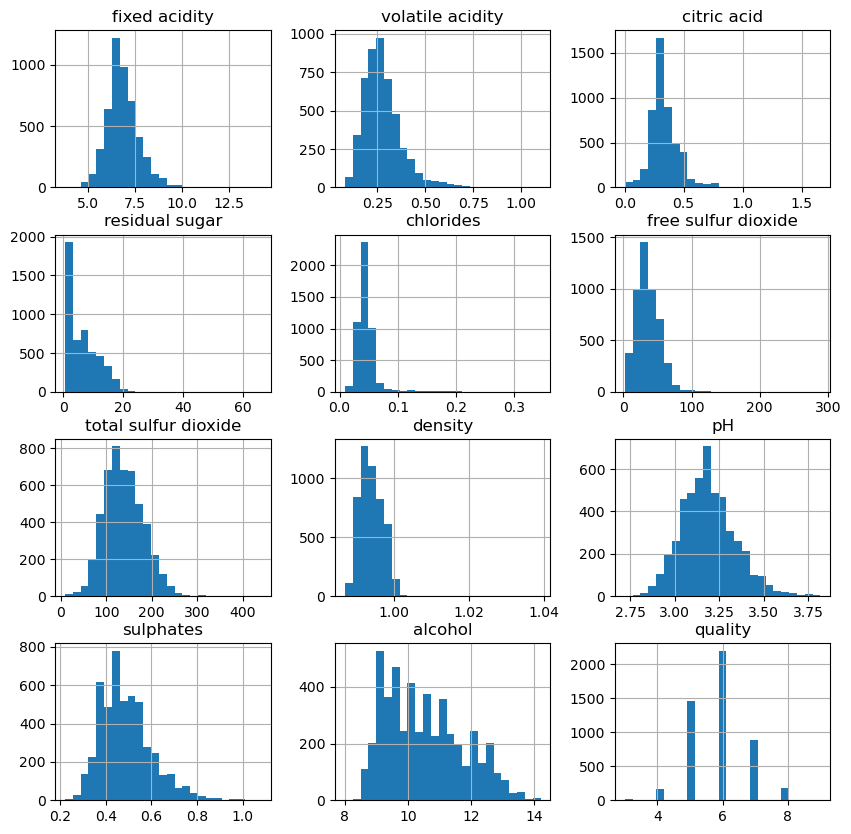

In [12]:
df.hist(bins=25,figsize=(10,10))
plt.show()

The values are distributed over different scales so we have to pre process the data through Scaling.


<Axes: >

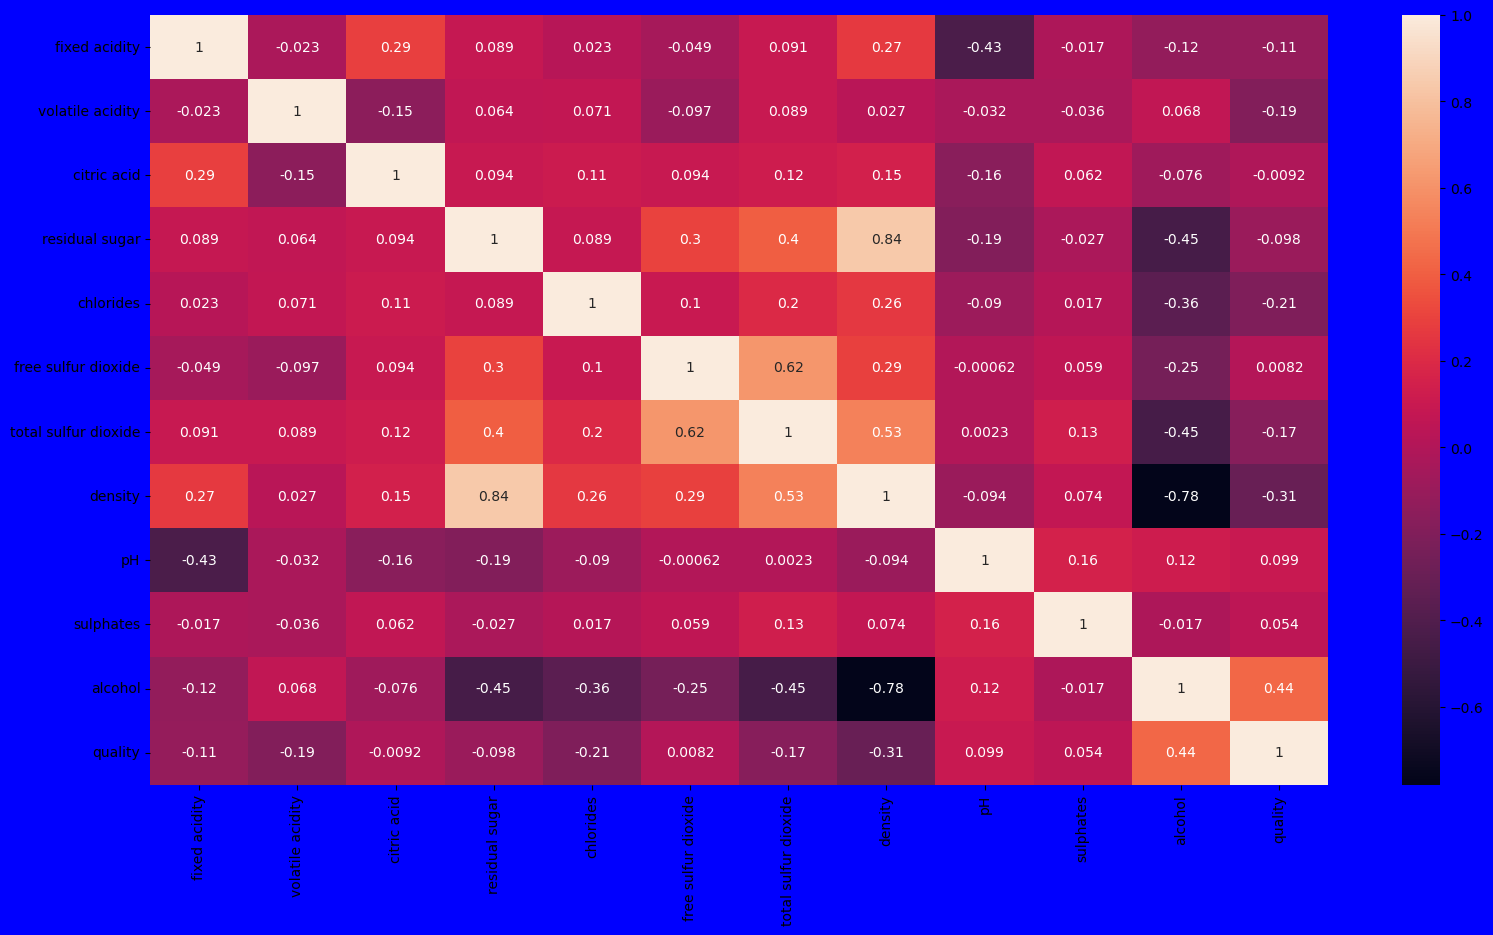

In [13]:
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

To determine correlation we have derived this heatmap which is obtained via statistical method that finds the bonding and relationship between two features.



## **Define Target Variable (y) and Feature Variables (X)**


In [14]:
y=df['quality']
y.shape


(4898,)

In [15]:
y

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [16]:
x=df.drop(['quality'],axis=1)
x.shape

(4898, 11)

In [17]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## **Data Preprocessing**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss= StandardScaler()

In [20]:
x=ss.fit_transform(x)

In [21]:
x

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## **Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,stratify=y, random_state=2259)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **Modeling**

In [25]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(x_train,y_train)


SVC()

## **Prediction**

In [26]:
y_pred=svc.predict(x_test)
y_pred

array([6, 6, 5, ..., 5, 5, 6], dtype=int64)

In [27]:
y_pred.shape

(1470,)

## **Model Evaluation**

In [28]:
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.43      0.06      0.11        49
           5       0.63      0.62      0.63       437
           6       0.55      0.76      0.64       660
           7       0.59      0.26      0.36       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1470
   macro avg       0.31      0.24      0.25      1470
weighted avg       0.55      0.58      0.54      1470



C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashw\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   4   2   0   0   0]
 [  0   3  24  22   0   0   0]
 [  0   4 273 158   2   0   0]
 [  0   0 125 501  34   0   0]
 [  0   0  10 185  69   0   0]
 [  0   0   0  42  11   0   0]
 [  0   0   0   0   1   0   0]]


# **Getting Model rerun with Two Class Created for wine quality**

Wine quality 3,4,5 labelled as 0

Wine quality 6,7,8,9 labelled as 1


In [31]:
y=df['quality'].apply(lambda y_value:1 if y_value>=6 else 0 )

In [32]:
y.value_counts()

1    3258
0    1640
Name: quality, dtype: int64

## **Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,stratify=y, random_state=2259)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## **Modeling**

In [36]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(x_train,y_train)


SVC()

## **Prediction**

In [37]:
y_pred=svc.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [38]:
y_pred.shape

(1470,)

## **Model evaluation**

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61       492
           1       0.79      0.88      0.83       978

    accuracy                           0.77      1470
   macro avg       0.74      0.71      0.72      1470
weighted avg       0.76      0.77      0.76      1470



In [41]:
print(confusion_matrix(y_test,y_pred))

[[264 228]
 [116 862]]


## **Explaination**
Under this model, we got to know how different features of wine affects its qulaity. Earlier it was used to be done by traditional experiments. But the use of Machine learning extracted and identified different patterns of variation among wine's quality predicting wine's quality through its features. The quality parameters were distributed at various scales so we divide it into two parameters as to get clear view of evaluations.

